<a href="https://colab.research.google.com/github/noman13bd/ML-Practice/blob/master/ML_Encoding_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Measure of Central Tendency

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
df = pd.read_csv('/content/drive/MyDrive/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [135]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

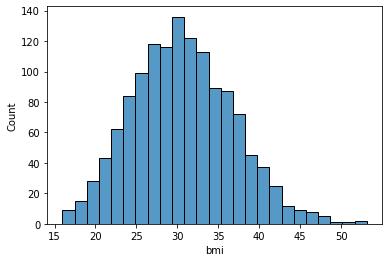

In [136]:
import seaborn as sns
sns.histplot(df.bmi)

In [137]:
# we can fill null values of a column by that column's meand or median
# for example:
df.bmi.mean()

30.663396860986538

In [138]:
df.bmi.median()

30.4

In [139]:
# we dont have any null values in any column in the DF. but if we have, we can do:
# df.bmi.fillna(df.bmi.mean(), inplace=True)

In [140]:
df_main = df.copy()

# Replace

In [141]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [142]:
df['region'].unique() # df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [143]:
df.region.replace(['southwest', 'southeast', 'northwest', 'northeast'], [3, 2, 0, 1], inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,3,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,0,21984.47061
4,32,male,28.880,0,no,0,3866.85520


# Label Encoder

In [144]:
df_le = df_main.copy()
df_le.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [145]:
from sklearn.preprocessing import LabelEncoder
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
le = LabelEncoder()
df_le['region'] = le.fit_transform(df_le['region'])
df_le.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,3,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,1,21984.47061
4,32,male,28.880,0,no,1,3866.85520


In [146]:
df_le2 = df_main.copy()
all_columns = df_le2.columns
all_columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [147]:
from pandas.api.types import is_string_dtype

for column in all_columns:
  if is_string_dtype(df_le2[column]):
    df_le2[column] = le.fit_transform(df_le2[column])

df_le2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# One Hot Encoder

In [148]:
df_ohe = df_main.copy()
dummy = pd.get_dummies(df_ohe.region)
df_ohe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [149]:
dummy.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [150]:
# drop region
df_ohe.drop('region', axis='columns', inplace=True)
df_ohe.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [151]:
dummy.drop(['northeast'], axis='columns', inplace=True)
# we can drop the first column when we get the dummies as below instead of using .drop
# dummy = pd.get_dummies(df_ohe.region, drop_first=True)
dummy.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [152]:
df_ohe_final = pd.concat([df_ohe, dummy], axis='columns')
df_ohe_final.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0


# One Hot Encoder Using loop

In [153]:
df_ohe_l = df_main.copy()
df_ohe_l.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [154]:
df_ohe_l['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [155]:
from pandas.api.types import is_string_dtype
columns = df_ohe_l.columns
for col in columns:
  if is_string_dtype(df_ohe_l[col]):
    # first get dummies
    dummy_oh = pd.get_dummies(df_ohe_l[col], drop_first=True, prefix=col)
    # and then concat it with the dataframe
    df_ohe_l = pd.concat([df_ohe_l, dummy_oh], axis=1)
    # now drop this non-numeric column
    df_ohe_l.drop(col, axis=1, inplace=True)
df_ohe_l.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


# Ordinal Encoding

In [156]:
df_oe = df_main.copy()
df_oe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [157]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder
encoded_values = encoder.fit_transform(df_oe[['region']])
encoded_values

array([[3.],
       [2.],
       [2.],
       ...,
       [2.],
       [3.],
       [1.]])

In [158]:
encoded_df = pd.DataFrame(encoded_values, columns=['encoded_region'])
encoded_df.head()

,encoded_region
0,3.0
1,2.0
2,2.0
3,1.0
4,1.0


In [159]:
df_oe['region'] = encoded_df['encoded_region']
df_oe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,3.0,16884.92400
1,18,male,33.770,1,no,2.0,1725.55230
2,28,male,33.000,3,no,2.0,4449.46200
3,33,male,22.705,0,no,1.0,21984.47061
4,32,male,28.880,0,no,1.0,3866.85520
